In [28]:
import sys

sys.path.append(".../src")
sys.path.append(".../Bayer")
sys.path.append(".../Fuji")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import numpy as np
from scipy import ndimage
from skimage import io
from skimage import transform
from src.blur import blur_RGB, Gauss_blur_RGB
from src.sharpen import sharpen_RGB
from src.edge_detector import detect_edges_RGB

In [30]:
image = io.imread("szczupak.jpg")
image=transform.resize(image,output_shape=(600,1000,3))
image.shape


(600, 1000, 3)

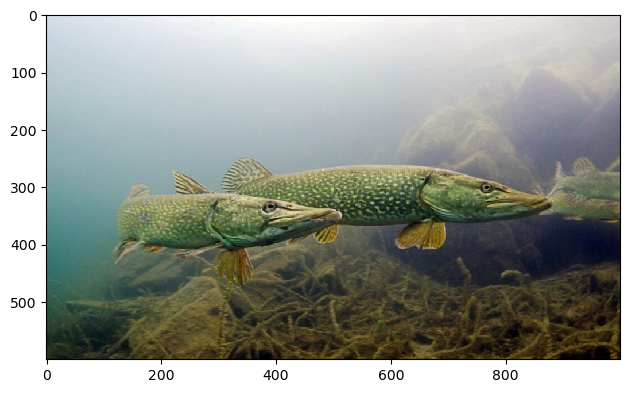

In [31]:
io.imshow(image)

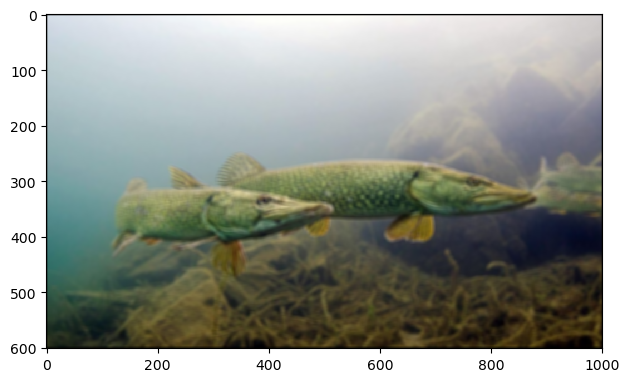

In [32]:
blured_image = blur_RGB(image, kernel_size=8)
io.imshow(blured_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


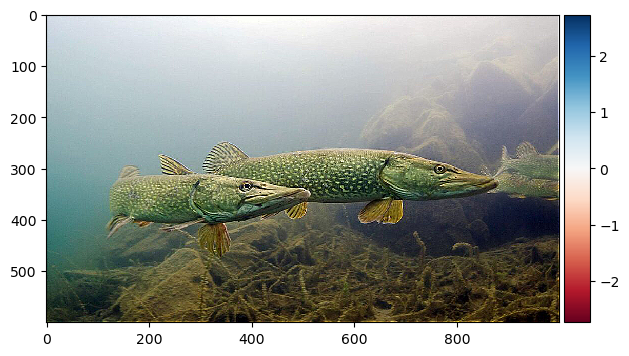

In [33]:
sharpen_image = sharpen_RGB(image)
io.imshow(sharpen_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


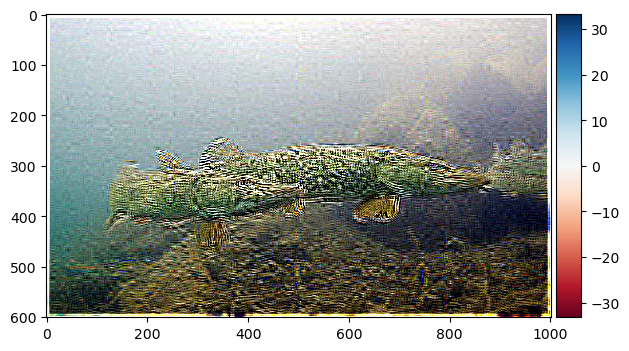

In [34]:
sharpen_image = blured_image
for i in range(4):
    sharpen_image=sharpen_RGB(sharpen_image)
    
io.imshow(sharpen_image)

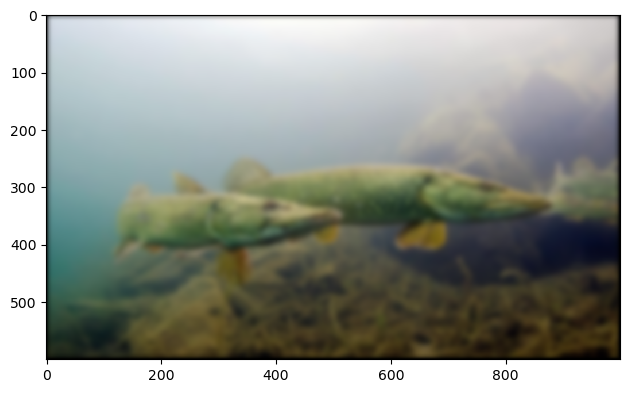

In [35]:
Gauss_blured_image=Gauss_blur_RGB(image, 56)
io.imshow(Gauss_blured_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


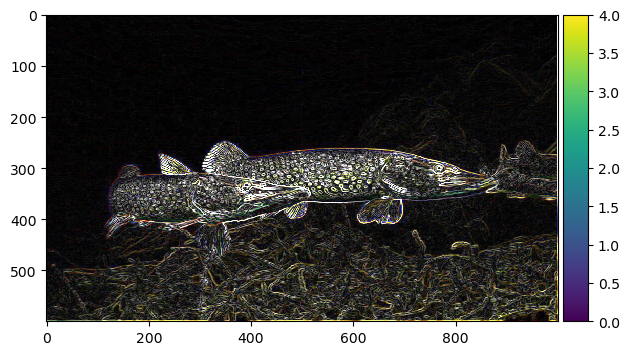

In [36]:
img=detect_edges_RGB(image)
io.imshow(img)